In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Add our data-augmentation parameters to ImageDataGenerator

train_dir = 'train'
validation_dir = 'test'

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 32, class_mode = 'categorical', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 32, class_mode = 'categorical', target_size = (224, 224))

Found 2835 images belonging to 14 classes.
Found 711 images belonging to 14 classes.


In [4]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(35, 35,3), include_top=False, weights="imagenet")


In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [7]:
import tensorflow as tf
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [8]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 88, epochs = 20)

Epoch 1/20
88/88 [==============================] - 359s 4s/step - loss: 0.7742 - acc: 0.8827 - val_loss: 0.2794 - val_acc: 0.9286
Epoch 2/20
88/88 [==============================] - 354s 4s/step - loss: 0.6360 - acc: 0.8802 - val_loss: 0.2826 - val_acc: 0.9286
Epoch 3/20
88/88 [==============================] - 354s 4s/step - loss: 0.5849 - acc: 0.8888 - val_loss: 0.4176 - val_acc: 0.9008
Epoch 4/20
88/88 [==============================] - 354s 4s/step - loss: 0.5895 - acc: 0.8862 - val_loss: 0.3706 - val_acc: 0.8828
Epoch 5/20
88/88 [==============================] - 355s 4s/step - loss: 0.5540 - acc: 0.8823 - val_loss: 1.4071 - val_acc: 0.5609
Epoch 6/20
88/88 [==============================] - 356s 4s/step - loss: 0.5524 - acc: 0.8857 - val_loss: 1.8028 - val_acc: 0.4632
Epoch 7/20
88/88 [==============================] - 356s 4s/step - loss: 0.5271 - acc: 0.8853 - val_loss: 1.3133 - val_acc: 0.5802
Epoch 8/20
88/88 [==============================] - 356s 4s/step - loss: 0.5065 - a

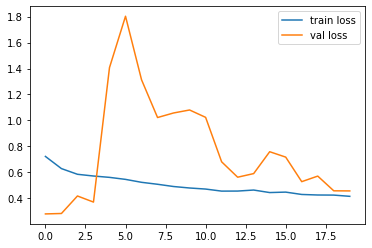

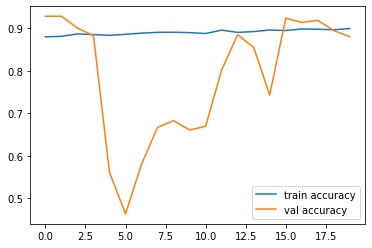

In [10]:
import matplotlib.pyplot as plt
plt.plot(resnet_history.history['loss'],label='train loss')
plt.plot(resnet_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(resnet_history.history['acc'], label='train accuracy')
plt.plot(resnet_history.history['val_acc'], label='val accuracy')
plt.legend()
plt.show()